In [403]:
# Importing Libraries
import os
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from tqdm import tqdm
from itertools import cycle

from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import feature_selection


from sklearn.utils import resample


pd.set_option("display.max_columns", None)

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [404]:
%%time
train_df = pd.read_csv('data.csv')
train_labels = pd.read_csv("train_labels.csv/train_labels.csv")
train_df.shape, train_labels.shape

Wall time: 4.48 s


((50000, 191), (458913, 2))

In [405]:
train_df = pd.merge(train_df, train_labels, how="inner", on=["customer_ID"])

In [406]:
df_majority = train_df[train_df['target'] == 0]
df_minority = train_df[train_df['target'] == 1]

In [407]:
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority), # match minority class
                                   random_state=42) # reproducible results


In [408]:
train_df = pd.concat([df_majority_downsampled, df_minority])
train_df = train_df.drop('Unnamed: 0',axis=1).reset_index(drop=True)
train_df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,013ec843f71879348f75868d5a898948b08bd202ab47ad...,2017-09-07,1.0050,0.005783,0.001355,0.81400,0.001833,NaN,0.009210,0.006977,NaN,0.03049,0.004738,0.013840,0.23950,0.005184,0.001347,0.4006,0.58000,0.004692,NaN,0.20670,0.027370,0.007740,NaN,0.004623,0.000959,0.206200,0.14690,0.77340,0.29540,NaN,0.006042,0.005580,1.001000,1.004,0.009740,NaN,0.014230,0.007755,0.047400,NaN,0.002903,0.006413,0.001657,NaN,0.008960,0.3810,0.008040,0.01837,0.004677,0.2840,0.326700,1,1,0.009125,0.005527,NaN,1.0040,0.003521,-1,0.00408,6,0.1869,0.001212,0.007767,0.006554,0.001486,0.005966,0.006554,0.008736,0.007706,0.5030,0.008710,NaN,0.000995,0.007050,0.006077,NaN,0.008340,0.007534,0.306200,0.000236,0.005787,0.004390,0.006424,0.004640,NaN,0.006720,0.004520,0.000398,0.001783,0.001464,0.006740,NaN,0.003748,1.001000,0.01640,0.001610,0.009160,0.001246,0.007340,0.007970,0.001687,NaN,0,0.003164,0.003899,NaN,0.007603,0.005928,NaN,1.0,0.007263,0.001275,0.007330,0.004852,0.007458,0.003603,1.005000,0.004242,0.003443,0.005780,0.005802,0.001543,0.006054,0.006786,0.006584,0.006344,0.007587,0.3030,0.1335,0.08276,0.9790,0.006180,1.020000,1.010000,0.958500,0.06223,NaN,0.334200,0.000621,0.001640,NaN,1.009,1,NaN,0.000137,NaN,NaN,NaN,1.006000,0.020050,NaN,0.000987,0,0.31760,0,3,0.3196,0.31320,0,0.5967,0.4363,0.005363,0.2803,0.005530,1,0.009800,1.000000,0.007416,0.002203,NaN,1.008000,0.005123,NaN,0.005970,0.003849,NaN,NaN,NaN,NaN,NaN,0.009384,0.008620,0.005570,NaN,0.004387,0.007730,0.006300,0
1,00f63ae5180162fc8fdeb0ad1195cd749a39e69aedded1...,2017-12-27,0.8286,0.418000,0.022960,0.81250,0.002316,0.15320,0.001590,0.003149,NaN,0.06900,0.002724,0.142700,0.61130,0.019910,0.007060,0.4263,0.58600,0.132900,NaN,0.03342,0.118100,0.001881,NaN,0.003876,0.022690,0.009514,0.21520,0.70500,0.04913,NaN,0.002913,0.014660,0.002438,1.007,0.003570,0.12780,0.023210,0.326200,0.179300,NaN,0.020890,0.009250,0.280000,NaN,0.013030,0.3618,0.033540,0.58600,0.001209,0.3289,0.262700,1,1,0.003914,0.175300,NaN,0.5845,0.007797,-1,0.00274,6,0.1908,0.005370,0.000698,0.005054,0.005320,0.006435,0.007360,0.027000,0.005700,0.3098,0.098800,NaN,0.001017,0.148000,0.140900,NaN,0.008070,0.005070,0.249400,0.019060,0.002552,0.006000,0.007412,0.005200,NaN,0.009476,0.403600,0.002108,0.009300,0.007298,0.004063,NaN,0.009990,1.008000,0.12700,0.007450,0.002850,0.006100,0.005770,0.004616,0.005814,NaN,0,0.007770,0.009750,NaN,0.006980,0.003990,NaN,1.0,0.008415,0.004723,0.003315,0.007990,0.005657,0.006844,1.001000,0.002886,0.006874,0.009300,0.007770,0.001537,0.008960,0.003841,0.004055,0.003702,0.007153,0.8930,0.1356,0.86670,0.9756,0.009094,0.365700,1.007000,0.958500,0.15300,NaN,0.342000,0.003470,0.023510,NaN,1.004,2,NaN,0.009880,NaN,NaN,NaN,1.000000,0.103700,0.009560,0.004100,1,0.56500,0,6,0.5605,0.56000,0,0.7430,0.5767,0.003323,0.1906,0.002970,1,0.004333,0.001160,0.001667,0.000911,NaN,1.001000,0.007960,NaN,0.008390,0.009445,NaN,NaN,NaN,NaN,NaN,0.005222,0.000613,0.001211,NaN,0.007614,0.006226,0.000516,0
2,02254827470f2d186464118db70de371e6a1dbb19158c3...,2017-12-01

In [409]:
# train_df = train_df.head(5000)

In [410]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25902 entries, 0 to 25901
Columns: 191 entries, customer_ID to target
dtypes: float64(177), int64(12), object(2)
memory usage: 37.7+ MB


In [411]:
train_df.S_2

0        2017-09-07
1        2017-12-27
2        2017-12-01
3        2017-06-03
4        2017-03-16
            ...    
25897    2017-11-25
25898    2017-12-26
25899    2018-01-29
25900    2018-02-26
25901    2018-03-06
Name: S_2, Length: 25902, dtype: object

In [412]:
train_df['S_2'] = pd.to_datetime(train_df['S_2'])

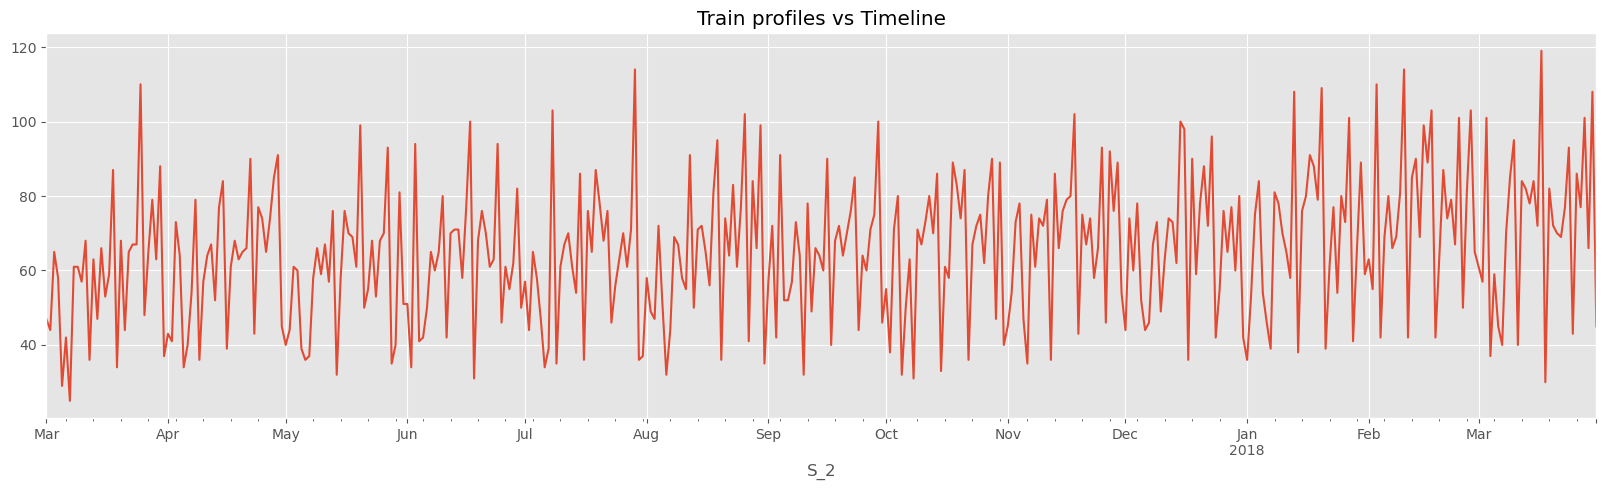

In [413]:
# Checking user profiles number of user profiles vs timeline

fig, ax = plt.subplots(figsize=(20,5))
train_df.groupby("S_2")['customer_ID'].count().plot()
plt.title("Train profiles vs Timeline")
plt.show()


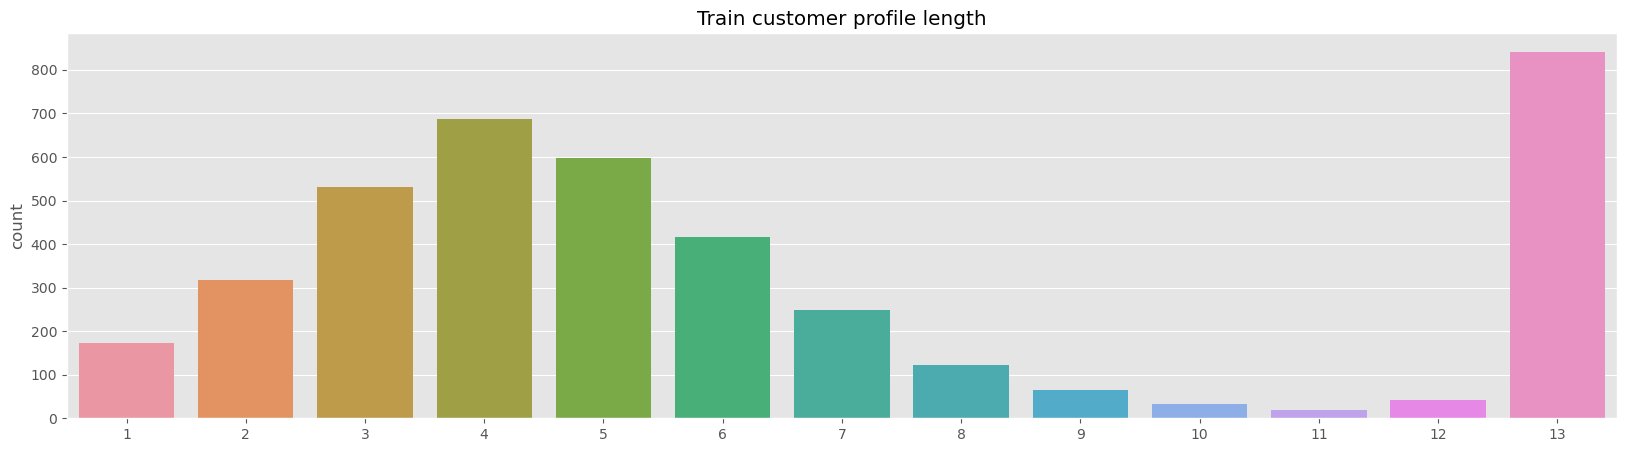

In [414]:
# Checking Customer Profile Lenght Distributions

fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x=train_df.groupby("customer_ID")['customer_ID'].count().values)
plt.title("Train customer profile length")
plt.show()


In [415]:
df = train_df

In [416]:
df.target.value_counts()

0    12951
1    12951
Name: target, dtype: int64

In [417]:
df.shape

(25902, 191)

In [418]:
df.isnull().sum()

customer_ID        0
S_2                0
P_2              193
D_39               0
B_1                0
               ...  
D_142          21021
D_143            502
D_144            210
D_145            502
target             0
Length: 191, dtype: int64

In [419]:
df.columns

Index(['customer_ID', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41',
       'B_3',
       ...
       'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143', 'D_144',
       'D_145', 'target'],
      dtype='object', length=191)

In [420]:
df.duplicated().sum()

0

In [421]:
nan_col = [i for i in df.columns if df[i].isnull().any()]

In [422]:
nan_col

['P_2',
 'B_2',
 'S_3',
 'D_41',
 'B_3',
 'D_42',
 'D_43',
 'D_44',
 'D_45',
 'D_46',
 'D_48',
 'D_49',
 'B_6',
 'B_8',
 'D_50',
 'D_52',
 'P_3',
 'D_53',
 'D_54',
 'S_7',
 'D_55',
 'D_56',
 'B_13',
 'S_9',
 'D_59',
 'D_61',
 'B_15',
 'D_62',
 'B_16',
 'B_17',
 'B_19',
 'B_20',
 'D_69',
 'B_22',
 'D_70',
 'D_72',
 'D_73',
 'D_74',
 'D_76',
 'D_77',
 'B_25',
 'B_26',
 'D_78',
 'D_79',
 'R_9',
 'D_80',
 'B_27',
 'D_81',
 'D_82',
 'D_83',
 'D_84',
 'B_29',
 'D_87',
 'D_88',
 'R_20',
 'B_33',
 'D_89',
 'D_91',
 'S_22',
 'S_23',
 'S_24',
 'S_25',
 'S_26',
 'D_102',
 'D_103',
 'D_104',
 'D_105',
 'D_106',
 'D_107',
 'R_26',
 'R_27',
 'D_108',
 'D_109',
 'D_110',
 'D_111',
 'B_39',
 'D_112',
 'S_27',
 'D_113',
 'D_115',
 'D_118',
 'D_119',
 'D_121',
 'D_122',
 'D_123',
 'D_124',
 'D_125',
 'D_128',
 'D_129',
 'B_41',
 'B_42',
 'D_130',
 'D_131',
 'D_132',
 'D_133',
 'D_134',
 'D_135',
 'D_136',
 'D_137',
 'D_138',
 'D_139',
 'D_140',
 'D_141',
 'D_142',
 'D_143',
 'D_144',
 'D_145']

In [423]:
len(nan_col)

107

In [424]:
for i in nan_col:
    df[i]=df[i].fillna(df[i].mean())

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25902 entries, 0 to 25901
Columns: 191 entries, customer_ID to target
dtypes: datetime64[ns](1), float64(177), int64(12), object(1)
memory usage: 37.7+ MB


In [426]:
df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,25902.000000,2.590200e+04,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,2.590200e+04,2.590200e+04,25902.000000,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,2.590200e+04,2.590200e+04,25902.000000,25902.000000,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,25902.000000,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,25902.000000,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,25902.000000,25902.000000,25902.000000,2.590200e+04,2.590200e+04,25902.0,25902.000000,2.590200e+04,25902.000000,25902.000000,2.590200e+04,2.590200e+04,25902.000000,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,25902.000000,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,25902.000000,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,25902.000000,2.590200e+04,25902.000000,25902.000000,2.590200e+04,25902.000000,2.590200e+04,2.590200e+04,25902.000000,2.590200e+04,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,2.590200e+04,2.590200e+04,2.590200e+04,25902.000000,2.590200e+04,2.590200e+04,2.590200e+04,25902.00000
mean,0.575097,1.794154e-01,0.173471,0.513180,1.230711e-01,0.261085,8.569489e-02,0.188037,0.211923,0.199102,1.752574e-01,2.192151e-01,0.217010,0.066836,7.649597e-02,0.489967,0.370432,0.481931,0.170423,0.117766,0.240975,5.362352e-01,0.145969,1.161502e-01,0.269506,0.158312,0.161434,0.578125,0.162864,9.467751e-02,0.098909,1.577387e-01,2.291612e-01,0.974381,0.049367,0.261331,0.080549,0.302500,0.371388,0.189504,0.094552,5.667589e-02,2.757997e-01,0.088423,0.119959,0.383256,0.364182,0.527115,0.057029,0.369902,0.147170,0.966489,1.694734,0.054741,4.417002e-01,0.767596,0.498541,2.20

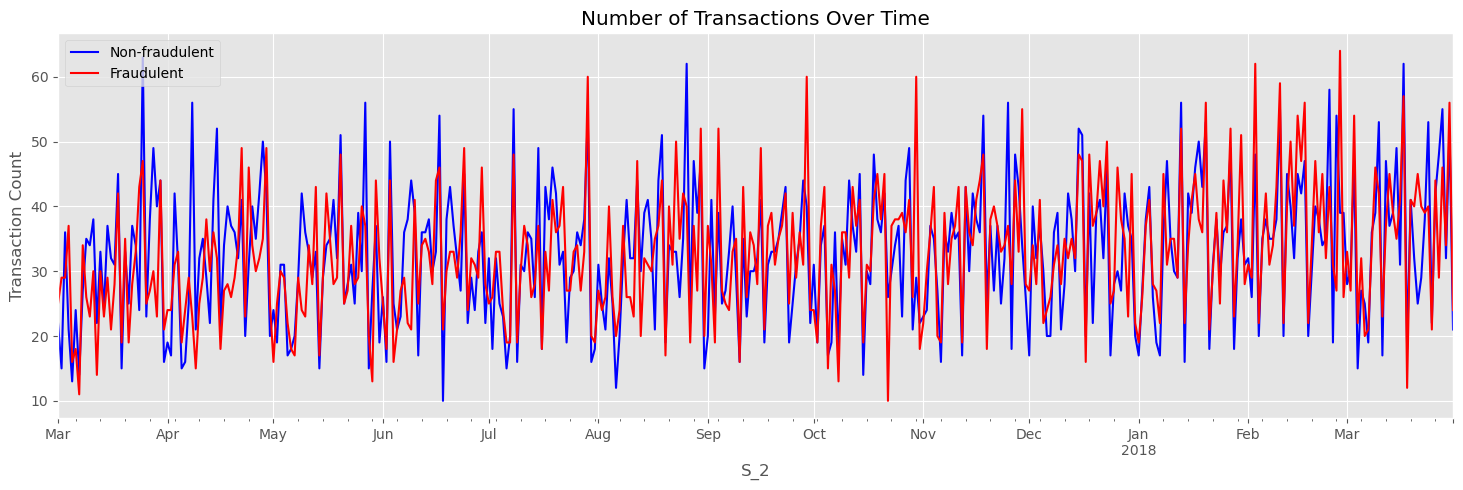

In [427]:
plt.figure(figsize=(18, 5))
df[df['target'] == 0].set_index('S_2').resample('D').size().plot(label='Non-fraudulent', legend=True,color='blue')
df[df['target'] == 1].set_index('S_2').resample('D').size().plot(label='Fraudulent', color='red', legend=True)
plt.title('Number of Transactions Over Time')
plt.ylabel('Transaction Count')
plt.show()

In [428]:
df.corr()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
P_2,1.000000,-0.219452,-0.322211,0.544289,-0.484117,-0.286455,-0.334657,-0.408409,-0.108634,-0.207644,-0.536933,-0.395218,0.369381,0.116306,-0.434334,-0.130631,0.419235,-0.722581,0.050183,0.164530,-0.489111,-0.407762,0.138162,0.345796,-0.547313,-0.268577,0.269312,0.441441,0.088318,-0.224651,-0.013440,-0.294210,0.143679,0.230667,-0.356055,-0.312432,0.088786,0.216757,-0.598829,0.139314,0.072393,-0.289915,-0.531728,-0.045090,-0.049509,-0.273566,0.117404,-0.643295,0.026425,0.076438,0.501066,-0.076296,-0.193773,-0.131244,-0.464998,-0.210874,0.597781,-0.387436,0.014283,-0.443785,0.223166,0.012703,-0.171364,0.153081,-0.064651,-0.036149,-0.343907,-0.318508,0.130251,-0.355296,-0.238987,-0.474712,0.024339,-0.248134,-0.488031,-0.527868,0.052607,-0.168723,-0.113564,0.355949,-0.162202,-0.005132,-0.392871,-0.177915,-0.229737,-0.036886,-0.062396,-0.056148,-0.276459,-0.074519,-0.002143,-0.373413,-0.028527,-0.022980,0.223817,-0.223453,-0.198255,-0.131273,-0.100488,-0.219460,-0.365205,-0.107236,-0.005672,-0.327613,0.012067,0.103584,NaN,-0.171990,-0.008523,-1.647487e-02,0.087582,0.002103,-0.099596,-0.121003,-0.091268,-0.215897,-0.114697,0.535923,-0.229571,-0.106965,-0.016286,0.151377,0.188655,0.063057,0.088326,-0.276069,-0.089167,0.072938,-0.116844,-0.223991,-0.121206,0.291118,0.078665,0.017851,-0.118214,-0.116875,0.051621,0.025620,-0.118360,-0.016883,-0.321182,-0.071324,0.307326,-0.428997,-0.005944,0.033702,0.004517,-0.003536,-0.003668,0.322322,-0.297426,0.063254,-0.226687,0.256072,0.288776,0.046206,0.158226,0.271296,0.268006,-0.178061,0.270200,0.233870,-0.091563,-0.074721,-0.095155,0.097623,0.272976,0.264383,0.221048,-0.136085,0.048120,-0.201020,-0.187263,0.027795,-0.113337,-0.011877,0.033978,0.003648,-0.001446,-0.005846,-0.010690,-0.185405,-0.138155,-0.181580,0.028234,-0.185358,0.010630,-0.154516,-0.658613
D_39,-0.219452,1.000000,0.155348,-0.212063,0.213364,0.071800,0.494094,0.164070,0.026125,0.041600,0.129237,0.157804,0.026912,0.042297,0.260133,0.029276,-0.015936,0.182389,0.007739,-0.057808,0.112004,-0.019498,-0.010700,-0.024347,0.184760,0.041970,-0.039518,-0.133510,-0.033477,0.094886,0.120659,0.152256,-0.216698,-0.325237,0.205719,0.096845,0.062470,0.093414,0.186875,0.006831,0.067145,0.189034,0.133258,0.018593,0.176113,0.065260,0.102557,0.155012,0.122182,0.075728,-0.087826,0.055611,0.060635,0.344339,0.204627,0.102365,-0.236259,0.075729,-0.014700,0.195935,0.017879,0.004127,0.092733,0.099053,0.019097,0.019605,0.135478,0.078029,-0.020669,0.081060,-0.035518,0.116752,0.003420,-0.040928,0.113310,0.145467,-0.029190,0.098947,0.102638,-0.048985,0.153870,0.079941,0.156669,0.052549,0.203085,-0.007668,0.031110,0.021916,0.112241,-0.012097,0.022288,0.118153,0.068424,0.021365,-0.115727,0.178247,0.103786,0.028496,0.028718,0.123232,0.135604,0.000685,0.013131,0.073128,0.064614,0.032729,NaN,0.052799,0.001999,3.448494e-02,-0.087445,0.000166,0.067627,-0.008382,0.033722,0.042559,0.038348,-0.251626,0.087026,0.010954,0.008311,-0.003838,0.004211,-0.003889,-0.023081,0.061632,0.050642,0.037647,0.117849,0.148078,0.126940,-

In [429]:
new_col=[]

corr_with_target = df.corr().target
filtered_indices = (corr_with_target > 0.4) | (corr_with_target < -0.4) 
filtered_values = corr_with_target[filtered_indices]

cnt = 0
for column_name, correlation_value in filtered_values.items():
    print(f"Column: {column_name}, Correlation: {correlation_value}")
    new_col.append(column_name)
    cnt += 1

print(f"Total Number of Important Columns: {cnt}")


Column: P_2, Correlation: -0.6586125093605851
Column: B_2, Correlation: -0.5216063514339206
Column: B_3, Correlation: 0.4057479130822532
Column: D_44, Correlation: 0.4443267155305365
Column: B_4, Correlation: 0.40519682184821604
Column: D_48, Correlation: 0.5714972111522343
Column: B_7, Correlation: 0.44576348502776947
Column: B_9, Correlation: 0.4926348556551731
Column: D_55, Correlation: 0.49752821561687793
Column: D_58, Correlation: 0.48214781796590916
Column: D_61, Correlation: 0.5304022606922529
Column: D_62, Correlation: -0.4416680608569566
Column: B_16, Correlation: 0.42831656075863733
Column: B_18, Correlation: -0.5684837296701398
Column: B_23, Correlation: 0.43781429237170133
Column: D_74, Correlation: 0.43677667903848627
Column: D_75, Correlation: 0.4809021388661592
Column: B_33, Correlation: -0.5079247131924245
Column: B_38, Correlation: 0.4043326971359333
Column: target, Correlation: 1.0
Total Number of Important Columns: 20


In [430]:
new_col

['P_2',
 'B_2',
 'B_3',
 'D_44',
 'B_4',
 'D_48',
 'B_7',
 'B_9',
 'D_55',
 'D_58',
 'D_61',
 'D_62',
 'B_16',
 'B_18',
 'B_23',
 'D_74',
 'D_75',
 'B_33',
 'B_38',
 'target']

In [431]:
df_final = df[new_col]

In [432]:
df_final

,P_2,B_2,B_3,D_44,B_4,D_48,B_7,B_9,D_55,D_58,D_61,D_62,B_16,B_18,B_23,D_74,D_75,B_33,B_38,target
0,1.0050,0.81400,0.006977,0.004738,0.013840,0.004692,0.027370,0.000959,0.047400,0.001657,0.018370,0.326700,0.005527,1.0040,0.008710,0.007050,0.006077,1.005000,1,0
1,0.8286,0.81250,0.003149,0.002724,0.142700,0.132900,0.118100,0.022690,0.179300,0.280000,0.586000,0.262700,0.175300,0.5845,0.098800,0.148000,0.140900,1.001000,2,0
2,0.7330,0.81000,0.001531,0.003845,0.007797,0.045530,0.006382,0.008890,0.066300,0.007206,0.007770,0.147170,0.174600,0.6846,0.005558,0.003307,0.076350,1.002000,2,0
3,0.9365,0.21280,0.052640,0.008064,0.022480,0.481931,0.045960,0.104000,0.001955,0.001060,0.527115,0.147170,0.592300,0.3374,0.034270,0.008240,0.069950,0.000631,3,0
4,0.5100,0.81350,0.191300,0.252400,0.603500,0.755400,0.520500,0.008710,0.836000,0.600000,0.866000,0.043670,0.501000,0.4124,0.557000,0.436000,0.402800,1.007000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25897,0.3218,0.06370,0.041080,0.005264,0.132000,0.630400,0.206300,0.639000,0.089000,0.114440,0.279000,0.012085,0.089660,0.2107,0.175800,0.143800,0.209500,0.008350,4,1
25898,0.3186,0.05838,0.054700,0.134200,0.129800,0.734000,0.140700,0.645000,0.146600,0.006886,0.704600,0.022490,0.174900,0.3157,0.117250,0.003065,0.074800,0.009360,4,1
25899,0.3416,0.05142,0.138200,0.009865,0.149500,0.537600,0.162400,0.636000,0.163000,0.112200,0.708500,0.027760,0.250700,0.2086,0.142800,0.148700,0.204200,0.004950,4,1
25900,-0.0954,0.07416,0.188800,0.175257,0.148400,0.481931,0.220100,0.632000,0.192300,0.152200,0.751500,0.003319,0.418500,0.2054,0.190100,0.221100,0.276000,0.004936,4,1


In [433]:
df_final.target.value_counts()

0    12951
1    12951
Name: target, dtype: int64

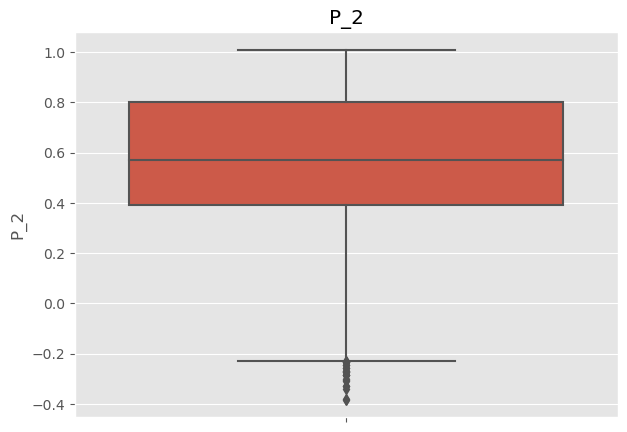

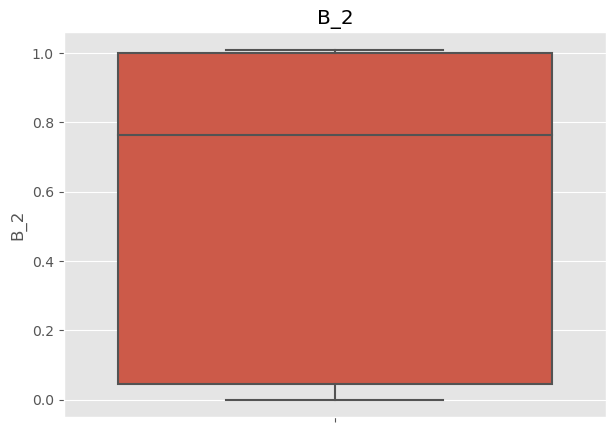

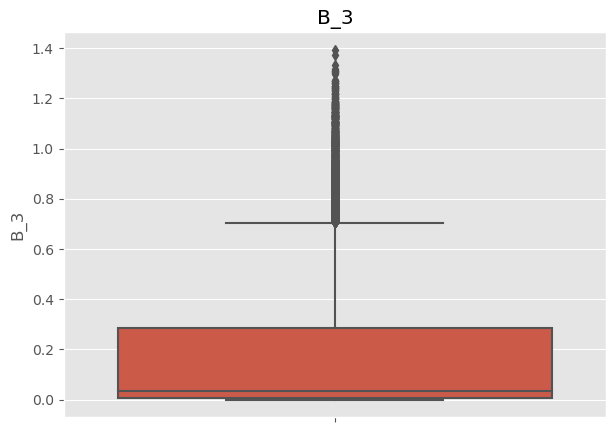

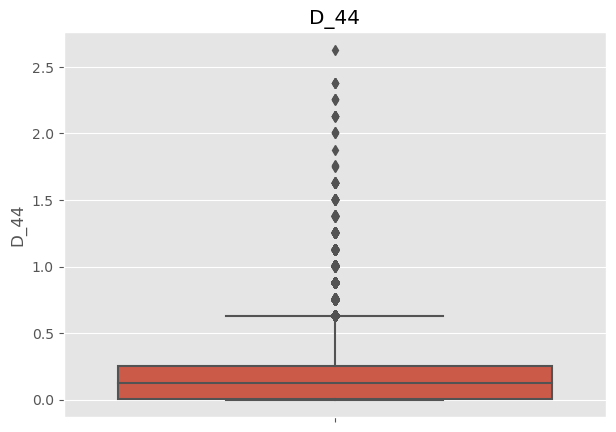

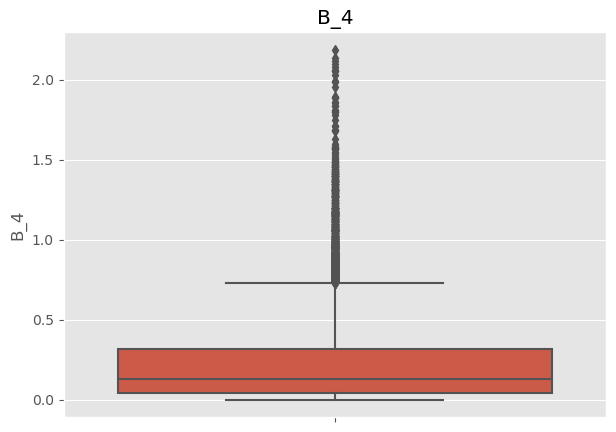

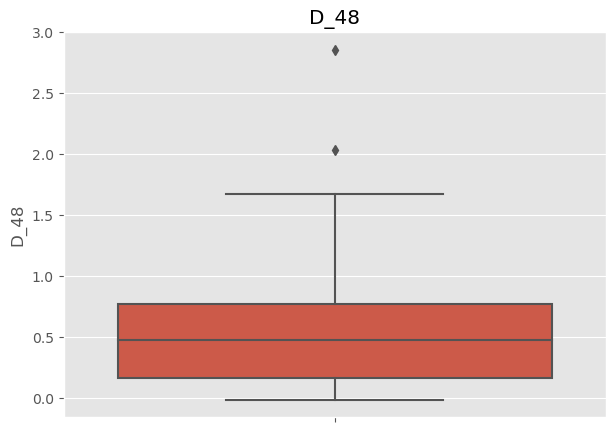

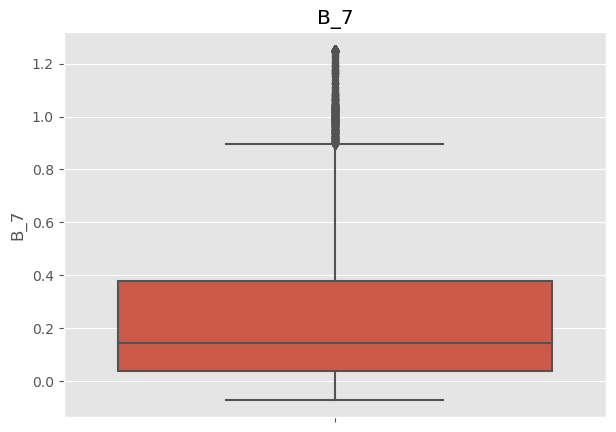

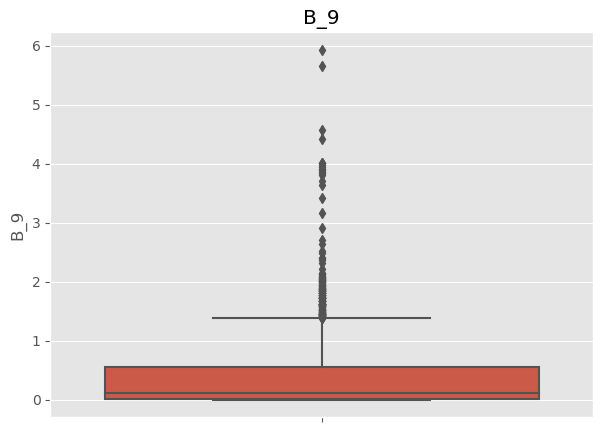

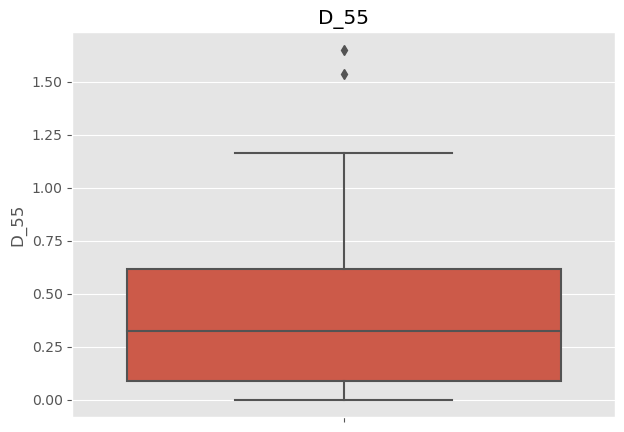

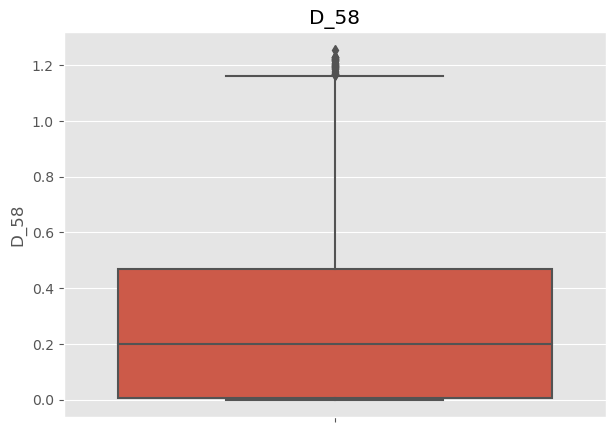

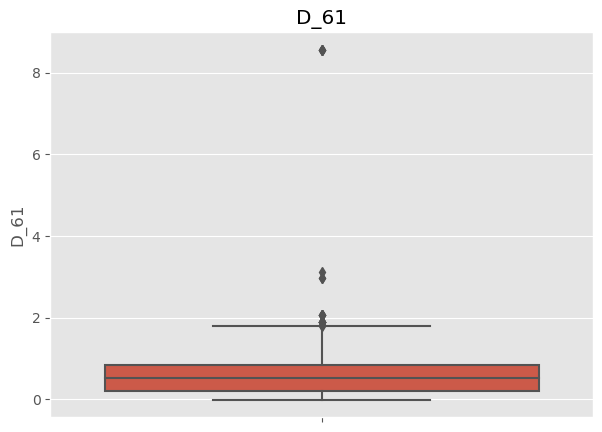

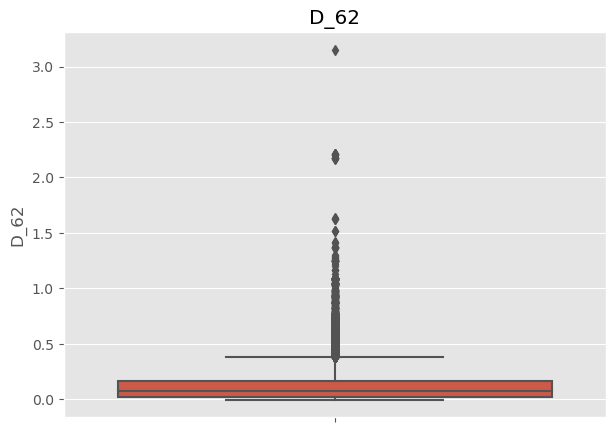

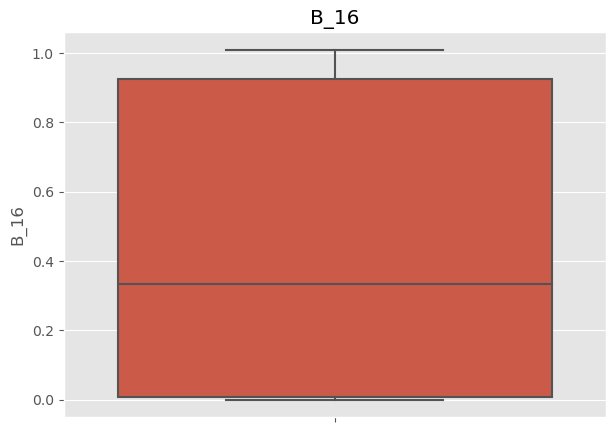

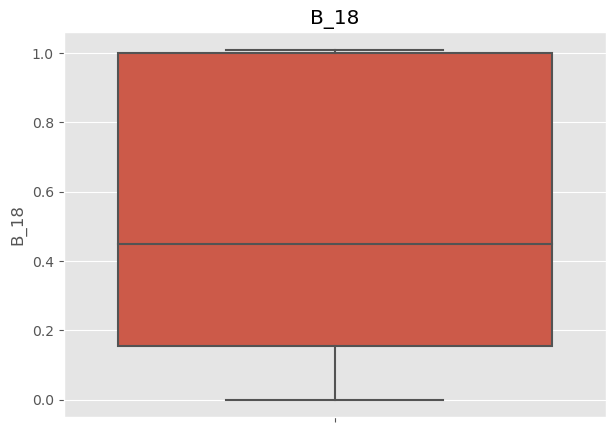

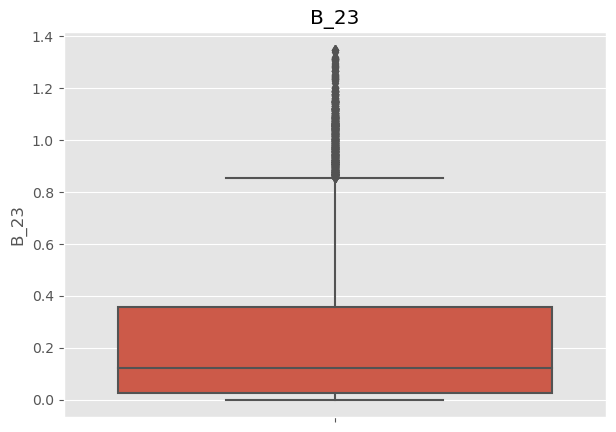

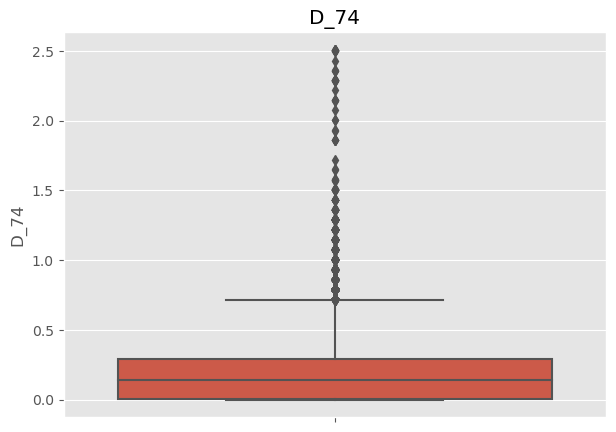

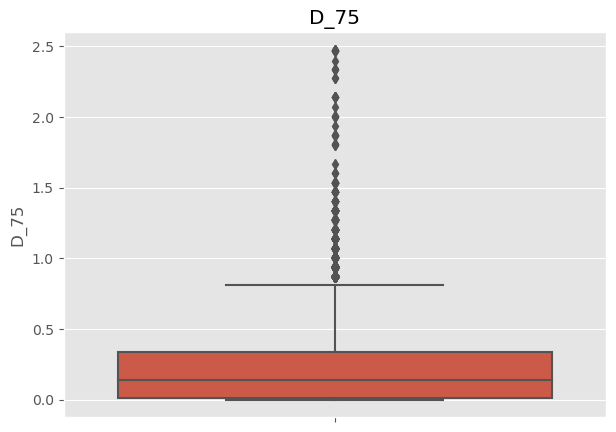

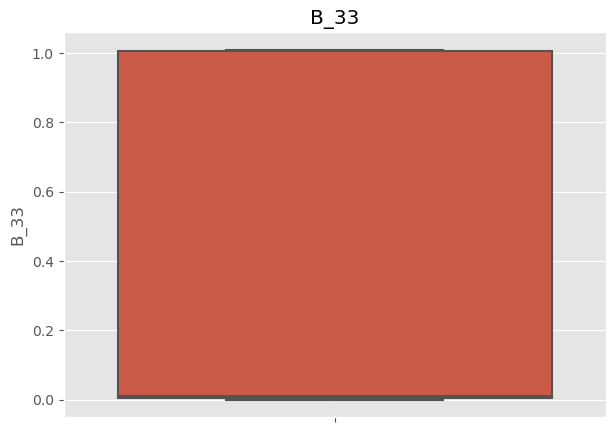

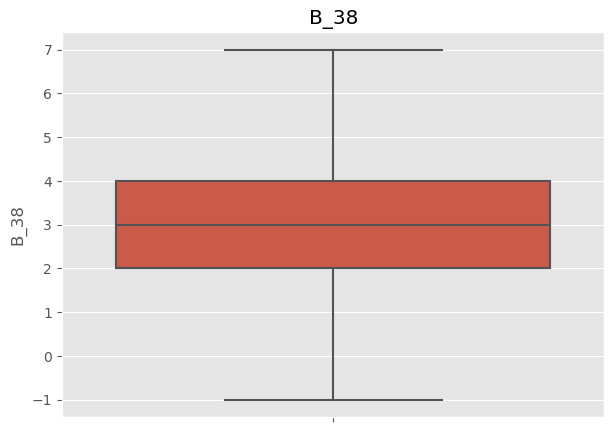

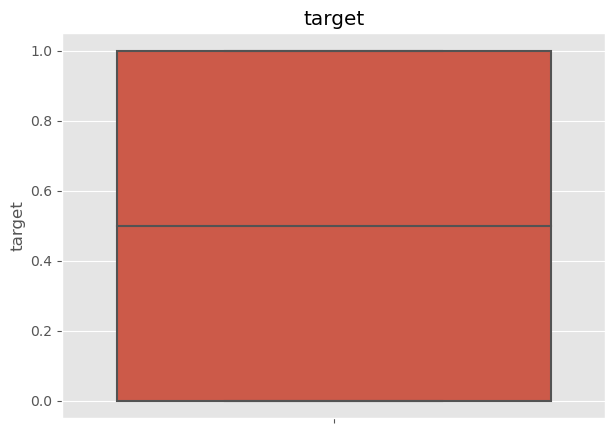

In [434]:
for column in df_final.columns:
    plt.figure(figsize=(7,5))  # this creates a new figure on which your plot will appear
    sns.boxplot(y=df_final[column])
    plt.title(column)
    plt.show()

<AxesSubplot:>

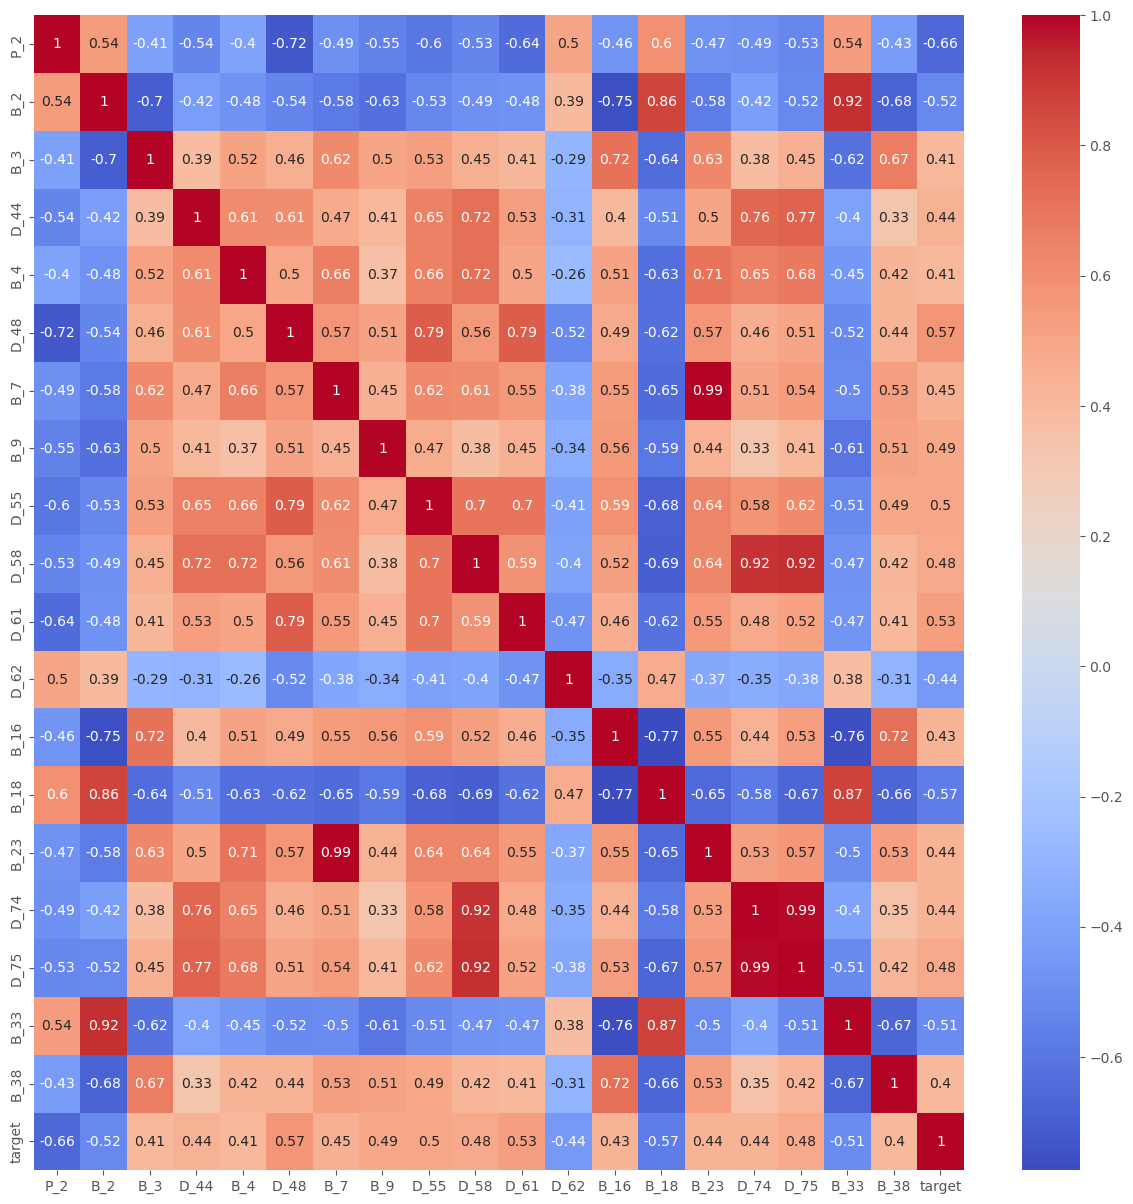

In [435]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_final.corr(), cmap="coolwarm",annot=True)

In [436]:
for column in df_final.columns:
    # Calculate the IQR for the column
    Q1 = df_final[column].quantile(0.25)
    Q3 = df_final[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df_final[column] = df_final[column].clip(lower=lower_bound, upper=upper_bound)

C:\Users\mohan\AppData\Local\Temp\ipykernel_13216\407429944.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[column] = df_final[column].clip(lower=lower_bound, upper=upper_bound)


In [437]:
X = df_final.iloc[:,:-1]
Y = df_final.iloc[:,-1]

In [438]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [439]:
# num_positives = sum(y_train == 1)
# num_negatives = sum(y_train == 0)

In [440]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [441]:
y_train.value_counts()

1    10390
0    10331
Name: target, dtype: int64

In [442]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## Baseline Model

In [443]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Create a pipeline with scaling and logistic regression
baseline_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
baseline_model.fit(X_train, y_train)

# Evaluate the model
y_pred2 = baseline_model.predict(X_test)
baseline_accuracy = roc(y_test, y_pred2)
print(f"Logistic Regression Baseline Accuracy: {baseline_accuracy:.4f}")
print(classification_report(y_test, y_pred))

Logistic Regression Baseline Accuracy: 0.8446
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2620
           1       0.84      0.90      0.87      2561

    accuracy                           0.86      5181
   macro avg       0.86      0.86      0.86      5181
weighted avg       0.86      0.86      0.86      5181



## Checking Cross-Validation Scores
Which one is Better?

In [455]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


# Stratified K-Fold
stratified_k_fold = StratifiedKFold(n_splits=5)

# 1. XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_scores = cross_val_score(xgb_clf, X, Y, cv=stratified_k_fold)
print("XGBoost Accuracy: %0.2f (+/- %0.2f)" % (xgb_scores.mean(), xgb_scores.std() * 2))

# 2. AdaBoost
ada_clf = AdaBoostClassifier()
ada_scores = cross_val_score(ada_clf, X, Y, cv=stratified_k_fold)
print("AdaBoost Accuracy: %0.2f (+/- %0.2f)" % (ada_scores.mean(), ada_scores.std() * 2))

# 3. Random Forest
rf_clf = RandomForestClassifier()
rf_scores = cross_val_score(rf_clf, X, Y, cv=stratified_k_fold)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std() * 2))


XGBoost Accuracy: 0.84 (+/- 0.02)
AdaBoost Accuracy: 0.84 (+/- 0.02)
Random Forest Accuracy: 0.86 (+/- 0.02)


##### RF has the higest CV score. Hence I will proceed with RF as my model.

In [444]:
# Set up the pipeline
pipeline = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('pca', PCA()),
    ('clf', RandomForestClassifier())
])


# # Set up the pipeline
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('pca', PCA()),
#     ('clf', XGBClassifier(scale_pos_weight=num_negatives / num_positives,  # Adjust this based on your dataset's class distribution
#                           use_label_encoder=False,   # To avoid warning in future XGBoost versions
#                           eval_metric="logloss"     # Recommended for binary classification
#                           ))
# ])


# # Set up the pipeline
# pipeline = Pipeline(steps=[
#     ('scaler',StandardScaler()),
#     ('pca', PCA()),
#     ('dtree',DecisionTreeClassifier())
# ])

In [445]:
# Hyperparameters grid of RandomForest Classifier
param_grid = {
    'pca__n_components': [3, 5, 7,9], 
    'clf__n_estimators': [20, 40, 60,80,100], 
    'clf__max_depth': [None, 2,4,6,8,10,12,14,16,18, 20],
    'clf__min_samples_split': [2, 5, 10],  # Additional hyperparameters
    'clf__min_samples_leaf': [1, 2, 4],
}


# # Hyperparameters grid of XGBClassifier
# param_distributions = {
#     'pca__n_components': [3, 5, 7], 
#     'clf__n_estimators': [20, 40, 60, 80, 100], 
#     'clf__max_depth': [2, 4, 6, 8, 10, 12],
#     'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'clf__subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'clf__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'clf__gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
#     'clf__min_child_weight': [1, 5, 10]
# }


# # Define hyperparameters grid of Desicion Tree Classifier
# param_grid = {
#     'pca__n_components': [i for i in range(1, X_train.shape[1] + 1)],
#     'dtree__criterion': ['gini', 'entropy'],
#     'dtree__max_depth': [None, 10, 20, 30, 40, 50],
#     'dtree__min_samples_split': [2, 5, 10],
#     'dtree__min_samples_leaf': [1, 2, 4],
#     'dtree__max_features': [None, 'auto', 'sqrt', 'log2'],
#     'dtree__max_leaf_nodes': [None, 10, 20, 30],
#     'dtree__min_impurity_decrease': [0.0, 0.1, 0.2],
#     'dtree__class_weight': [None, 'balanced']
# }

In [446]:
# # Use a different scoring metric (e.g., F1) due to the imbalance
# grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
 
    
# Using RandomizedSearchCV with the pipeline:
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                        n_iter=100, cv=5, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
    

In [447]:
# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca', PCA()),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'clf__max_depth': [None, 2, 4, 6, 8, 10,
                                                           12, 14, 16, 18, 20],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10],
                                        'clf__n_estimators': [20, 40, 60, 80,
                                                              100],
                                        'pca__n_components': [3, 5, 7, 9]},
                   random_state=42, scoring='f1', verbose=1)

In [448]:
# # Evaluate the best estimator
# best_model = grid_search.best_estimator_
# print("Best F1 score:", grid_search.best_score_)
# print("Test set F1 score:", best_model.score(X_test, y_test))
# print("Best parameters:", grid_search.best_params_)


best_model = random_search.best_estimator_
print("Best F1 score:", random_search.best_score_)
print("Test set F1 score:", best_model.score(X_test, y_test))
print("Best parameters:", random_search.best_params_)

Best F1 score: 0.865789066365443
Test set F1 score: 0.8681721675352249
Best parameters: {'pca__n_components': 9, 'clf__n_estimators': 100, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 2, 'clf__max_depth': 14}


In [449]:
y_pred = best_model.predict(X_test)

In [450]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [451]:
confusion_matrix(y_test,y_pred)

array([[2188,  432],
       [ 251, 2310]], dtype=int64)

In [452]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.86      2620
           1       0.84      0.90      0.87      2561

    accuracy                           0.87      5181
   macro avg       0.87      0.87      0.87      5181
weighted avg       0.87      0.87      0.87      5181



In [453]:
print(roc_auc_score(y_test,y_pred))

0.8685529567112085


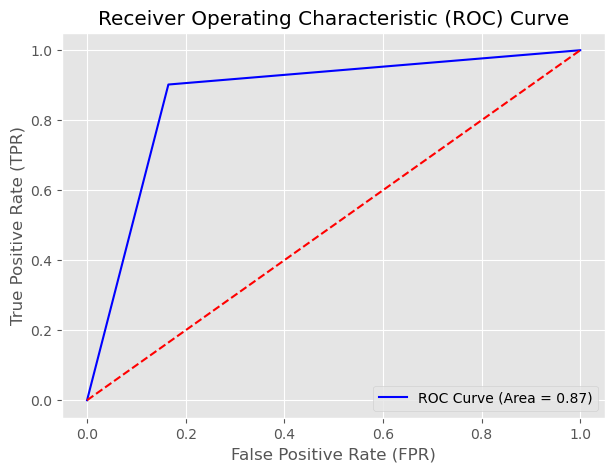

In [454]:
# Get the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test,y_pred)

# Plotting
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (Area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###### Area Under the Curve (AUC):
The shaded area under the ROC curve, in this case, has a value of 0.87 (as indicated by the label). AUC quantifies the overall ability of the classifier to distinguish between the positive and negative classes. The closer the AUC is to 1, the better the classifier's performance. An AUC of 0.5 (where the curve would coincide with the red dashed line) indicates a classifier performing no better than random chance.

###### Red Dashed Line:
This line represents the performance of a random classifier. Any model that performs above this line is considered to have some skill in classification, while a model that lies on this line is equivalent to random guessing.

###### Interpreting the Curve:
If the blue line is closer to the top-left corner of the plot, the classifier has better performance.
The steeper the initial rise of the ROC curve, the more the true positives occur before the false positives, indicating better classifier performance.